In [30]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


In [31]:
#Importing spam.csv file
df  = pd.read_csv('/Users/Kunal Singh/Downloads/spam.csv')

Data Exploration

In [32]:
df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [33]:
df.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')

In [34]:
df.isnull().sum()

make          0
address       0
all           0
3d            0
our           0
over          0
remove        0
internet      0
order         0
mail          0
receive       0
will          0
people        0
report        0
addresses     0
free          0
business      0
email         0
you           0
credit        0
your          0
font          0
0             0
money         0
hp            0
hpl           0
george        0
650           0
lab           0
labs          0
telnet        0
857           0
data          0
415           0
85            0
technology    0
1999          0
parts         0
pm            0
direct        0
cs            0
meeting       0
original      0
project       0
re            0
edu           0
table         0
conference    0
semicol       0
paren         0
bracket       0
bang          0
dollar        0
pound         0
cap_avg       0
cap_long      0
cap_total     0
Class         0
dtype: int64

### Extracting `Dependent` and `Independent` Variables

In [35]:
#Extracting Dependent and Independent Variables
x=df.drop(['cap_avg', 'cap_long', 'cap_total', 'Class'], axis=1)
y=df['Class']

### Train Test Split
- Test size is 78% of data provided, training data =1012 instances and testing data=3589 instances

In [36]:
# Splitting the dataset into training and test set.
# test_size is 78% of data provided, training data = 1012 instances ,testdata = 3589 instances
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.78, random_state=0)

In [37]:
#feature Scaling 
st= StandardScaler() 
x_train= st.fit_transform(x_train) 
x_test= st.transform(x_test)
x_train

array([[-0.35370985, -0.16560941, -0.55448549, ..., -0.41255456,
        -0.35455819, -0.2029156 ],
       [ 1.79839476, -0.16560941, -0.55448549, ..., -0.24976478,
        -0.35455819, -0.2029156 ],
       [-0.35370985, -0.16560941, -0.55448549, ...,  0.17064379,
        -0.35455819,  6.07733056],
       ...,
       [-0.35370985, -0.16560941, -0.55448549, ..., -0.41255456,
        -0.35455819, -0.2029156 ],
       [-0.35370985, -0.16560941, -0.55448549, ..., -0.41255456,
        -0.35455819, -0.2029156 ],
       [-0.35370985,  0.2753713 ,  0.48075744, ...,  1.41764513,
         1.31739319, -0.2029156 ]])

In [38]:
#Displaying rows and coloumns of X training Data and Y Training Data
x_train.shape, y_train.shape

((1012, 54), (1012,))

### Reporting `Task-1`
- Comparing the accuracies of the `fused model` with `AdaBoost Ensemble with Decision Tree` as the base learner. `Train` the classifiers using the first `1012 instances` and use the remaining `3589` for `testing`.

### Voting Classifier
- A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.


Decision tree Classifier
Per Class accuracy for 'TRUE' in Decision tree Classifier is  91.05166051660517 %
Per Class accuracy for 'FALSE' in Decision tree Classifier is  86.55876143560872 %
Accuracy of  Decision tree Classifier is 89.27277793257174


Logistic Regression
Per Class accuracy for 'TRUE' in Logistic Regression is  93.35793357933579 %
Per Class accuracy for 'FALSE' in Logistic Regression is  85.99577762139339 %
Accuracy of  Logistic Regression is 90.44302033992756


Gaussian Bayes
Per Class accuracy for 'TRUE' in Gaussian Bayes is  73.61623616236163 %
Per Class accuracy for 'FALSE' in Gaussian Bayes is  95.2146375791696 %
Accuracy of  Gaussian Bayes is 82.16773474505433


Voting Clasifier
Per Class accuracy for 'TRUE' in Voting Clasifier is  92.11254612546126 %
Per Class accuracy for 'FALSE' in Voting Clasifier is  91.2033779028853 %
Accuracy of  Voting Clasifier is 91.75257731958763




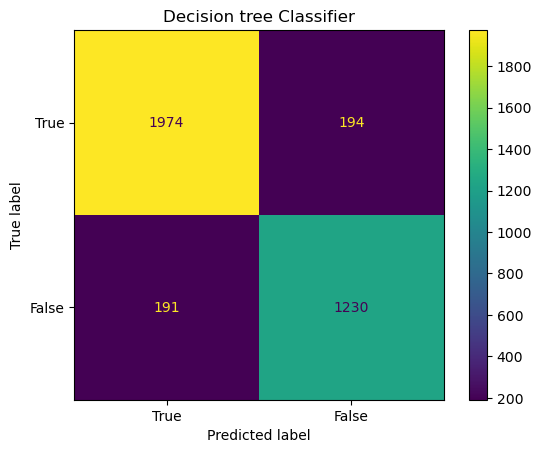

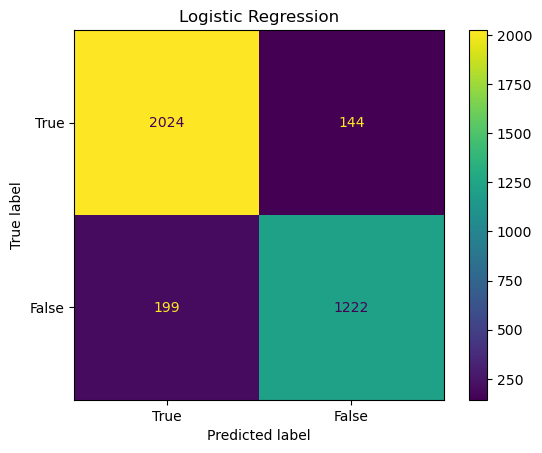

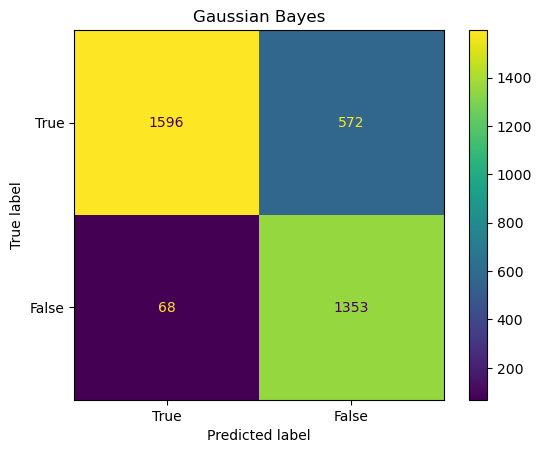

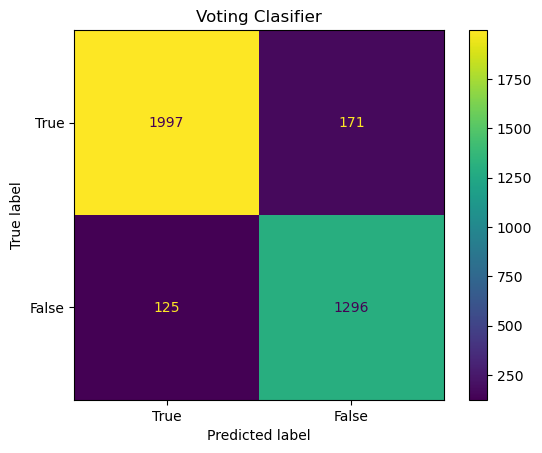

In [39]:
#Decision Tree 
decisionclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

#Logistic Regression
logisticRegr=LogisticRegression(random_state=0)

#Gaussian Naive Bayes
Gaussian_Bayes=GaussianNB()

#Voting Classifier
Voting_Classifier=VotingClassifier(estimators=[('Decision Tree Classifier', decisionclassifier), ("Logistic Regression", logisticRegr), ("Gaussian Naive Bayes", Gaussian_Bayes)], voting="hard")


#Creating a dictionary containing all the three classifiers and Voting Classifier
three_classifiers={"Decision tree Classifier": decisionclassifier, "Logistic Regression" : logisticRegr, "Gaussian Bayes": Gaussian_Bayes, "Voting Clasifier": Voting_Classifier}

#Using for loop to get accuracy and confusion matrix of all classifiers 
for clf in three_classifiers:
    classifiers=three_classifiers[clf]
    classifiers.fit(x_train, y_train)
    y_pred=classifiers.predict(x_test)
    
#Creating the Confusion matrix
    cm= confusion_matrix(y_test, y_pred)
    TP_RC, FN_RC, FP_RC, TN_RC=cm[0][0], cm[0][1], cm[1][0], cm[1][1] 

#Classifiers Confusion Matrix
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
    cm_display.plot()
    cm_display.ax_.set(title=clf)
    plt.show

#Displaying Accuracy of all classifiers
    print(clf)
    print("Per Class accuracy for 'TRUE' in", clf, "is ", (TP_RC/(TP_RC+FN_RC))*100, "%" )
    print("Per Class accuracy for 'FALSE' in", clf, "is ", (TN_RC/(FP_RC+TN_RC))*100, "%" )
    accuracy=accuracy_score(y_test, y_pred)
    print("Accuracy of ", clf, "is", accuracy*100)
    print("\n")
    

### AdaBoost (Adaptive Boosting)
- AdaBoost is a boosting ensemble model and works especially well with the decision tree. Boosting model's key is learning from the previous mistakes.


Per Class accuracy for 'TRUE' in AdaBoost Classifier is  93.17343173431735 %
Per Class accuracy for 'FALSE' in AdaBoost Classifier is  89.86629134412387 %
Accuracy of AdaBoost Classifier is 91.86402897743105


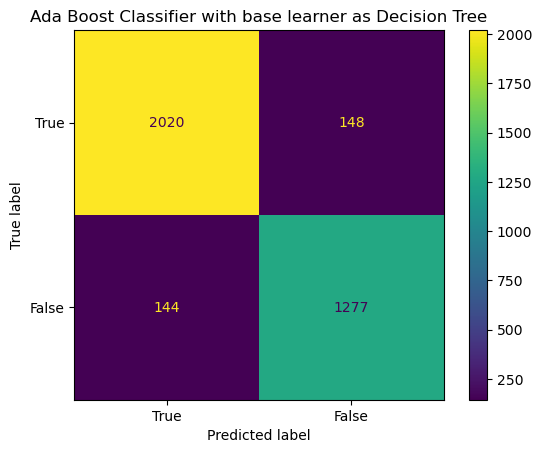

In [40]:
#AdaBoost Classifier
#Using Decision tree as base classifier in AdaBoost Classifier
Ada_Boost_Classifier=AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_Boost_Classifier.fit(x_train, y_train)
y_pred=Ada_Boost_Classifier.predict(x_test)
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
TP_RC, FN_RC, FP_RC, TN_RC=cm[0][0], cm[0][1], cm[1][0], cm[1][1] 

#Ada Boost Classifier Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
cm_display.plot()
cm_display.ax_.set(title="Ada Boost Classifier with base learner as Decision Tree")
plt.show

#Displaying Accuracy of Ada Boost classifier
print("Per Class accuracy for 'TRUE' in AdaBoost Classifier is ", (TP_RC/(TP_RC+FN_RC))*100, "%" )
print("Per Class accuracy for 'FALSE' in AdaBoost Classifier is ", (TN_RC/(FP_RC+TN_RC))*100, "%" )
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of AdaBoost Classifier is", accuracy*100)


### Reporting Task 2
- Compare the `accuracies` of the `fused model with Random Forest` (with 1000 base learners). `Train` the classifiers using the first `1000 instances` and use the remaining `3601` for `testing`.

### Random Forest Classifier

Per Class accuracy for 'TRUE' in Random Forest Classifier is  95.84870848708486 %
Per Class accuracy for 'FALSE' in Random Forest Classifier is  88.24771287825475 %
Accuracy of Random Forest Classifier is 92.83923098356088


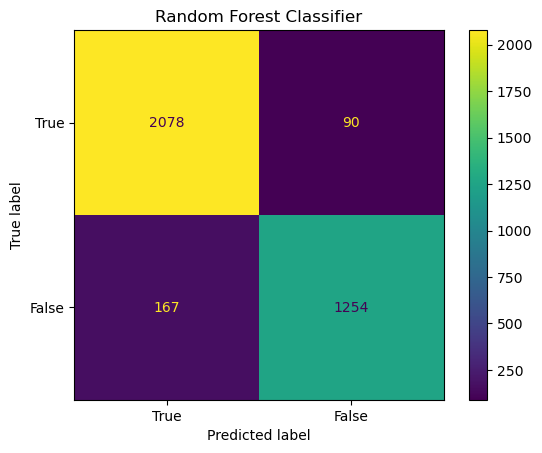

In [41]:
#Random Forest Classifier
#Assigning Random Forest Classifier to rf_classifier
rf_classifier=RandomForestClassifier(n_estimators=1000, max_features='auto')

#Fitting Random forest classifier model
rf_classifier.fit(x_train, y_train)
y_pred=rf_classifier.predict(x_test)

#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
TP_RC, FN_RC, FP_RC, TN_RC=cm[0][0], cm[0][1], cm[1][0], cm[1][1] 

#Random Forest Classifier Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
cm_display.plot()
cm_display.ax_.set(title="Random Forest Classifier")
plt.show

#Displaying Accuracy of all classifiers
print("Per Class accuracy for 'TRUE' in Random Forest Classifier is ", (TP_RC/(TP_RC+FN_RC))*100, "%" )
print("Per Class accuracy for 'FALSE' in Random Forest Classifier is ", (TN_RC/(FP_RC+TN_RC))*100, "%" )
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier is", accuracy*100)

### Reporting Task 3
- Study the impact of `training sample size` on the `accuracies` of the `fused classifier` and the `AdaBoost Ensemble with Decision Tree` as the base learner. Compare their accuracies with the following training-test splits: `50%-50%`, `60%-40%`, `70%-30%`, and `80%-20%`.

In [42]:
# Splitting the dataset into training and test set.
test_size_comaprision=[0.5, 0.4, 0.3, 0.2]

#Empty List to store accuracies of Voting classifier and Ada Boost Ensemble
accuracy_list_voting_classifier=[]
accuracy_list_Ada_boost=[]

#Using for loop to train with different Training size and compare their accuracies
for test_size_input in test_size_comaprision:
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = test_size_input, random_state=0)
    print("Training size:", (1-test_size_input)*100, "Testing Size:",test_size_input*100 )
    
#Decision Tree
    decisionclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
#Logistic Regression
    logisticRegr=LogisticRegression(random_state=0)
#Gaussian Naive Bayes
    Gaussian_Bayes=GaussianNB()
#Voting Classifier
    Voting_Classifier=VotingClassifier(estimators=[('Decision Tree Classifier', decisionclassifier), ("Logistic Regression", logisticRegr), ("Gaussian Naive Bayes", Gaussian_Bayes)], voting="hard")
#Fitting Voting Classifier
    Voting_Classifier.fit(x_train, y_train)
    y_pred=Voting_Classifier.predict(x_test)

#Displaying Accuracy of  Voting Classifier classifiers
    accuracy=accuracy_score(y_test, y_pred)
#Creating list for all accuracy to plot graph
    accuracy_list_voting_classifier.append(accuracy)
    print("Accuracy of Voting Classifier is", accuracy*100)
    
    
#AdaBoost Classifier
#Using Decision tree as base classifier
    Ada_Boost_Classifier=AdaBoostClassifier(n_estimators=100, random_state=0)
    Ada_Boost_Classifier.fit(x_train, y_train)
    y_pred=Ada_Boost_Classifier.predict(x_test)

#Displaying Accuracy of AdaBoost classifiers
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_list_Ada_boost.append(accuracy)
    print("Accuracy of AdaBoost Classifier is", accuracy*100)
    print("\n")
    

Training size: 50.0 Testing Size: 50.0
Accuracy of Voting Classifier is 92.69882659713168
Accuracy of AdaBoost Classifier is 93.08996088657105


Training size: 60.0 Testing Size: 40.0
Accuracy of Voting Classifier is 92.72134709397066
Accuracy of AdaBoost Classifier is 93.37316675719718


Training size: 70.0 Testing Size: 30.0
Accuracy of Voting Classifier is 93.12092686459088
Accuracy of AdaBoost Classifier is 93.70021723388848


Training size: 80.0 Testing Size: 20.0
Accuracy of Voting Classifier is 93.70249728555918
Accuracy of AdaBoost Classifier is 93.59391965255158




- Dummy lists for plotting "Accuracy Percentage Vs Training Size" graph 

In [43]:
for dummy in range(4):
    accuracy_list_voting_classifier[dummy]=accuracy_list_voting_classifier[dummy]*100

accuracy_list_voting_classifier


[92.69882659713168, 92.72134709397066, 93.12092686459088, 93.70249728555918]

In [44]:
for dummy in range(4):
    accuracy_list_Ada_boost[dummy]=accuracy_list_Ada_boost[dummy]*100

accuracy_list_Ada_boost
    

[93.08996088657105, 93.37316675719718, 93.70021723388848, 93.59391965255158]

#### Graph "Accuracy Percentage Vs Training Size"

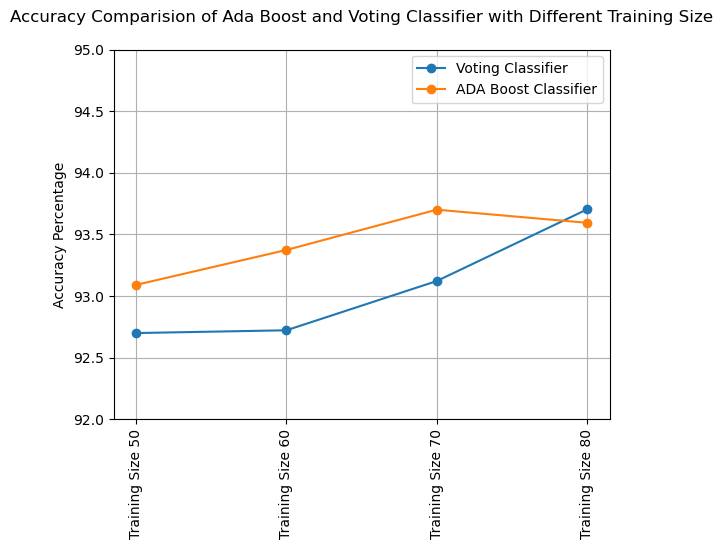

In [45]:
train_size=[50, 60, 70, 80]
train_size_list=["Training Size 50", "Training Size 60", "Training Size 70", "Training Size 80"]

plt.plot(train_size,accuracy_list_voting_classifier, label="Voting Classifier", marker='o')
plt.plot(train_size,accuracy_list_Ada_boost, label="ADA Boost Classifier", marker='o')
plt.ylim(92, 95)
plt.xticks(train_size, train_size_list, rotation='vertical')
plt.ylabel("Accuracy Percentage")
plt.title("Accuracy Comparision of Ada Boost and Voting Classifier with Different Training Size", pad="20.0")
plt.grid(True)
plt.legend()
plt.show()
